In [1]:
%matplotlib notebook
import pandas as pd 
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
runtime_df = pd.read_csv('../../Resources/clean_netflix_shows.csv',index_col= 0)
runtime_df.head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Omdb Review Score,Omdb Review Count,Month,Year,Financial Quarter
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2.5,"1,515",August,2019,3
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,3.9,31,August,2020,3
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2.6,"1,201",December,2019,4
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,3.2,"32,162",January,2018,1
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,3.4,"1,048",October,2020,4
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,7.8,"587,337",November,2019,4
6,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,3.7,"10,245",June,2020,2
7,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English,4.6,"3,160",March,2018,1
8,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi,4.2,"3,955",May,2021,2
9,Searching for Sheela,Documentary,"April 22, 2021",58,4.1,English,4.1,573,April,2021,2


## Finding a relation beteween IMDB scores and Runtime

In [3]:
#groupby on IMDB score
imdb_groupby = runtime_df.groupby('IMDB Score')
runtime_mean= imdb_groupby['Runtime'].mean()


<IPython.core.display.Javascript object>


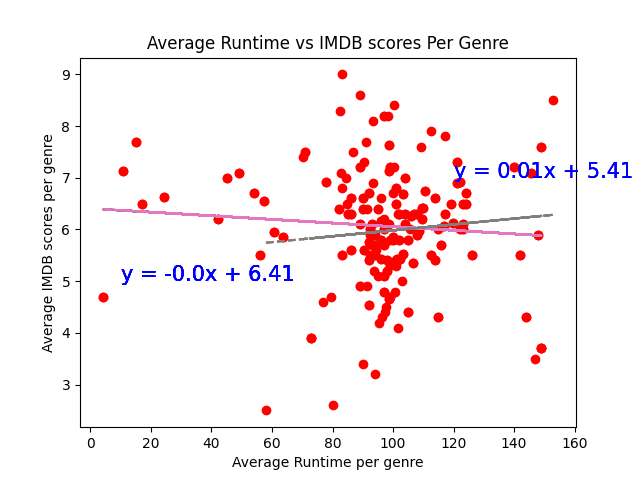

Text(0.5, 1.0, ' Average Runtime vs IMDB scores of Netflix Originals')

In [4]:
#plotting a scatter plot for the imdb scores
x_axis = runtime_mean
y_axis = runtime_df['IMDB Score'].unique()
plt.scatter(x_axis,y_axis,color = 'Red')
plt.xlabel("Average Runtime")
plt.ylabel("IMDB scores")
plt.title(" Average Runtime vs IMDB scores of Netflix Originals")


In [16]:
# calculating and plotting the linear regression for the imdb scores 
corr,_ = st.pearsonr(x_axis,y_axis)
print(f"The correlation coefficient between the IMDB score and the average runtime on netflix is {corr}")

# finding linear regression values and plotting them on scatter plot
rt_slope,rt_int,rt_r,rt_p,rt_std_err = st.linregress(x_axis,y_axis)
rt_fit = rt_slope*x_axis + rt_int
#plotting
plt.plot(x_axis,rt_fit,"--")
#annotating the line equation on plot
line_eq = "y = " + str(round(rt_slope,2)) + "x + " + str(round(rt_int,2))
plt.annotate(line_eq,(120,7),fontsize=15,color="blue")
plt.savefig("../../Output/2_runtime_vs_IMDBscores.png")


The correlation coefficient between the IMDB score and the average runtime on netflix is 0.057233243229455256


## Find a relation between IMDB Score and Runtime on each Genre

In [9]:
#plot initiate
genre_groupby = runtime_df.groupby('Genre')
runtime_pergenre = genre_groupby['Runtime'].mean()
score_pergenre = genre_groupby['IMDB Score'].mean()

In [10]:
#plotting the runtime versus IMDB score for each genre
plt.scatter(runtime_pergenre,score_pergenre,color= "Red")
plt.xlabel("Average Runtime per genre")
plt.ylabel("Average IMDB scores per genre")
plt.title("Average Runtime vs IMDB scores Per Genre")

Text(0.5, 1.0, 'Average Runtime vs IMDB scores Per Genre')

In [15]:
# calculating and plotting the linear regression 
corr,_ = st.pearsonr(runtime_pergenre,score_pergenre)
print(f"The correlation coefficient between the IMDB score and the average runtime on netflix is {corr}")

# finding linear regression values and plotting them on scatter plot
genre_slope,genre_int,genre_r,genre_p,genre_std_err = st.linregress(runtime_pergenre,score_pergenre)
genre_fit = genre_slope*runtime_pergenre + genre_int
#annotating the line equation on plot
line_eq = "y = " + str(round(genre_slope,2)) + "x + " + str(round(genre_int,2))
plt.annotate(line_eq,(10,5),fontsize=15,color="Blue")
#plotting
plt.plot(runtime_pergenre,genre_fit,"--")
plt.savefig("../../Output/2_runtime_vs_IMDBGenre.png")

The correlation coefficient between the IMDB score and the average runtime on netflix is -0.11717285835391689
